<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/Kor_Univ/tensorflow_0415_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
#MNIST data를 이용한 MLP기반 숫자 인식 기술 개발 
"""
입력레이어 28x28영상을 flatten 함수를 통해 784개의 값으로 변환
은닉레이어: 각각 250, 100개의 값을 출력하는 레이어 구성
출력 레이어 0~9에 대한 맥칭 확률을 출력
"""

#perceptron은 모든 
#CNN은 국부 영역만 들어가게 되어 dense layer를 적용하지 않음-> 마지막 flatten과정에서 dense적용


In [ ]:
#MNIST 데이터 불러오기 
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#0-1까지의 값으로 normalization -> 255로 나누기 

In [ ]:
print(X_train.shape)  #28x28 크기, 6만 학습용 데이터의 개수 
print(y_train.shape) #각 영상마다 하나의 값이 있으므로 

(60000, 28, 28)
(60000,)


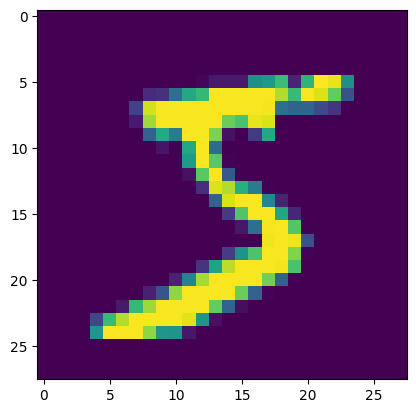

In [ ]:
plt.imshow(X_train[0, :, :])

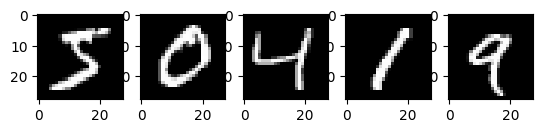

In [ ]:
img = X_train[0, :, :]


f,axrr = plt.subplots(1,5)
for i in range(5):
  axrr[i].imshow(X_train[i, :, :], cmap='gray')
  
  
  
#28x28data를 하나씩 뿌려보기

In [ ]:
#정답도 5개 뿌려보기

print(y_train[0:5])

[5 0 4 1 9]


In [ ]:
#test에 대해서는? #train data보다 적음~ 

print(X_test.shape)  
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),

    #hidden layer-> dense를 이용하여 만듬, 250개의 node를 만듬, activation fucn은 relu적용
    tf.keras.layers.Dense(250, activation='relu'), #레이어를 통과했을때 노드의 수 250인 dense layer를 만들어라
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'), #10개의 출력을 가진 dense layer를 만들어라 
   
   #마지막은 확률이어야 함 -> softmax적용
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [ ]:
#dense 두 종류가 있다. 
convolution 
perceptron

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(250, activation='relu'), 
                                    tf.keras.layers.Dense(100, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation ='softmax')
                                    ])

In [ ]:
#optimizer ->adam 이용(최근에 가장 널리 쓰이는 optimizer)<- SDG에서 adam으로 트랜드가 변홤
model.compile(optimizer = 'adam', 
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs = 10) 
#최대 epoch 10번, 길어지면 정확도가 높아지나,
#너무 많이 하면 과적합 발생
model.evaluate(X_test, y_test)

#초기값이 random하게 나와서, 매번 결과가 다르게 나오게됨 

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2793 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1049 - accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0334 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss

[0.08762155473232269, 0.9790999889373779]

In [ ]:
model.fit(X_train, y_train, batch_size= 10, epochs = 10) 
#최대 epoch 10번, 길어지면 정확도가 높아지나,
#너무 많이 하면 과적합 발생
model.evaluate(X_test, y_test)

#초기값이 random하게 나와서, 매번 결과가 다르게 나오게됨 

Epoch 1/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.4220 - accuracy: 0.8770
Epoch 2/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.2238 - accuracy: 0.9368
Epoch 3/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.1794 - accuracy: 0.9495
Epoch 4/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1535 - accuracy: 0.9566
Epoch 5/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1322 - accuracy: 0.9624
Epoch 6/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.1185 - accuracy: 0.9655
Epoch 7/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1113 - accuracy: 0.9676
Epoch 8/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 9/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0968 - accuracy: 0.9710
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss

[0.15638555586338043, 0.9778000116348267]

In [ ]:
#랜덤 숫자를 생성해서, 영상을 뽑아서 결과 확인
idx = np.random.randint(len(X_test))

image= X_test[idx] #28x28은 tf에 들어가지 못함, 앞에 demension을 추가 해야함

image  = np.expand_dims(image, axis = 0) #(0,28,28)

#(60000, 28,28)로 학습 -> 들어갈때는 (1,28,28)

print(image.shape)
#plt.imshow(image, cmap='gray')


(1, 28, 28)


In [ ]:
y_pred = model.predict(image)
print(y_pred)

#9.99993443e-01 결과값 -> 1에 가까움 

1/1 [==============================] - 0s 219ms/step
[[2.53807131e-09 2.45267324e-06 6.95467065e-07 9.99993443e-01
  8.18183646e-11 1.00251064e-07 8.60285476e-13 2.01482408e-06
  1.60976612e-07 1.19939807e-06]]


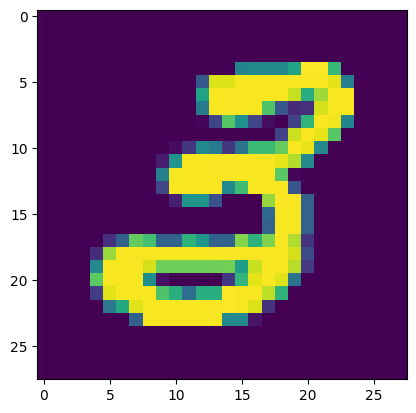

In [ ]:
#정확하게 나왔는지 확인하기 
plt.imshow(image[0])

In [ ]:
#랜덤 숫자를 생성해서, 영상을 뽑아서 결과 확인
idx = np.random.randint(len(X_train))

image= X_train[idx:idx+5] #(28,25)

plt.imshow(image, cmap='gray')


y_pred = model.evaluate(image)

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


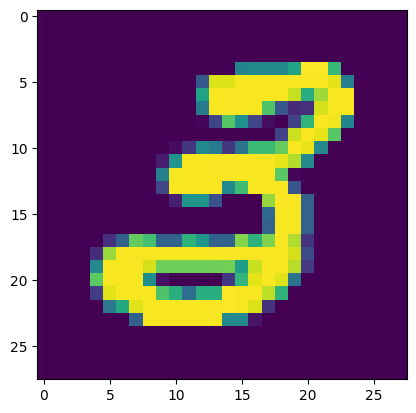

In [ ]:
#round로 올려서 확인해 보기 

y_pred = model.predict(image)

print(np.round(y_pred, 3))
plt.imshow(image[0])


#[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] -> 0,1,2,3 --> 3이 정답 맞음 